In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

In [2]:
# some experimental constants
nsubjects = 20
nstillfaces = 50
nmovingfaces = 50

In [3]:
# still response = gaussian with mean=0, std=1
still_resp_1 = np.random.randn(nsubjects, nstillfaces)

# moving response = gaussian with mean=1, std=1
moving_resp_1 = np.random.randn(nsubjects, nmovingfaces) + 1

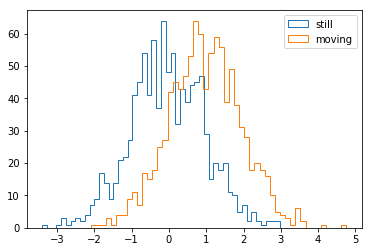

In [5]:
plt.hist(still_resp_1.ravel(), 50, histtype='step', label='still')
plt.hist(moving_resp_1.ravel(), 50, histtype='step', label='moving');
plt.legend()

In [7]:
scipy.stats.ttest_ind(still_resp_1.mean(axis=1), moving_resp_1.mean(axis=1))

Ttest_indResult(statistic=-29.039071239805946, pvalue=1.5035370620403646e-27)

In [12]:
# still response = gaussian with mean=0, std=1
still_resp_2 = np.random.randn(nsubjects, nstillfaces)

# moving response = gaussian with mean=0.25, std=1
moving_resp_2 = np.random.randn(nsubjects, nmovingfaces) + 0.25

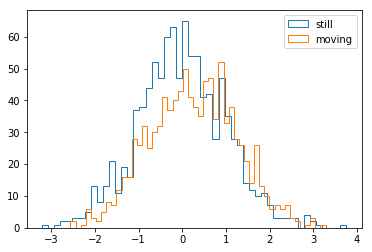

In [13]:
plt.hist(still_resp_2.ravel(), 50, histtype='step', label='still')
plt.hist(moving_resp_2.ravel(), 50, histtype='step', label='moving');
plt.legend()

In [14]:
scipy.stats.ttest_ind(still_resp_2.mean(1), moving_resp_2.mean(1))

Ttest_indResult(statistic=-4.788732929464289, pvalue=2.5628848117658384e-05)

In [15]:
# baseline response = gaussian with mean=0, std=3
subject_baseline = np.random.randn(nsubjects) * 3

# still response = gaussian with mean=0, std=1
still_resp_3 = np.random.randn(nsubjects, nstillfaces) + subject_baseline[:,np.newaxis]

# moving response = gaussian with mean=0.25, std=1
moving_resp_3 = np.random.randn(nsubjects, nmovingfaces) + 0.25 + subject_baseline[:,np.newaxis]

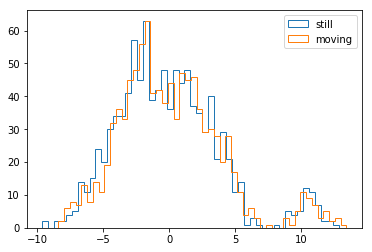

In [16]:
plt.hist(still_resp_3.ravel(), 50, histtype='step', label='still')
plt.hist(moving_resp_3.ravel(), 50, histtype='step', label='moving');
plt.legend()

In [17]:
scipy.stats.ttest_ind(still_resp_3.mean(1), moving_resp_3.mean(1))

Ttest_indResult(statistic=-0.1684288484525621, pvalue=0.867139211541192)

In [19]:
scipy.stats.ttest_rel(still_resp_3.mean(1), moving_resp_3.mean(1))

Ttest_relResult(statistic=-5.050358722234567, pvalue=7.105265047599228e-05)

In [20]:
# equivalent to:
scipy.stats.ttest_1samp(moving_resp_3.mean(1) - still_resp_3.mean(1), 0)

Ttest_1sampResult(statistic=5.050358722234567, pvalue=7.105265047599228e-05)

In [92]:
# alternative experiment!
# hypothesis: in people with ASD, there is a smaller response
# to moving face stimuli in STS than in people without ASD

nsubjects_per_group = 100

asd_subject_baseline = np.random.randn(nsubjects_per_group) * 3
nonasd_subject_baseline = np.random.randn(nsubjects_per_group) * 3

asd_responses_1 = np.random.randn(nsubjects_per_group, nmovingfaces) + asd_subject_baseline[:,np.newaxis]
nonasd_responses_1 = np.random.randn(nsubjects_per_group, nmovingfaces) + 0.25 + nonasd_subject_baseline[:,np.newaxis]


# we need many more subjects in this case because the between subject variability is high!
# and there's no way to "pair" data, because each sample comes from a different subject


In [96]:
asd_responses_1.mean(1), nonasd_responses_1.mean(1)

(array([ 2.17086426e-01, -2.95997606e+00, -6.23226208e+00,  2.19603774e+00,
         2.12782504e+00, -3.61043247e+00,  9.71638004e-01,  4.66307927e+00,
         1.37720826e+00,  5.13309795e+00,  2.89981627e-03, -1.69775894e+00,
        -5.70110793e-01,  3.14976615e+00, -4.02585628e+00, -2.19141806e+00,
         2.15743114e+00,  3.03478570e+00, -2.22622169e+00,  6.90272184e-01,
        -1.28954152e+00, -2.64510426e+00,  1.30704630e-01,  3.75698449e+00,
        -1.09175576e-01,  3.48669132e-01,  5.78665576e+00,  7.11971608e-01,
        -4.25704240e+00, -2.17512114e+00, -5.14475508e-01, -3.21443141e+00,
         5.22676106e+00, -9.65124319e-01,  2.31125843e+00, -2.22584960e+00,
         3.44291644e+00, -3.53196152e+00,  4.32628424e-01, -6.27030743e-01,
         1.68592898e+00, -4.24148171e+00, -1.01185875e-01, -1.74202701e+00,
         8.19279232e-01, -2.39862032e+00,  1.28118079e+00,  5.64928879e-02,
        -1.02688641e+00, -2.75931475e+00,  2.66903468e+00, -1.06421610e+00,
        -5.0

In [93]:
scipy.stats.ttest_ind(asd_responses_1.mean(1), nonasd_responses_1.mean(1))

Ttest_indResult(statistic=-1.262082925973379, pvalue=0.20840355405635652)